In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("Crop_recommendation.csv", delimiter=',')

print("Preview data:\n", df.head())
print("\nTipe data tiap kolom:\n", df.dtypes)
print("\nJumlah data kosong per kolom:\n", df.isnull().sum())

Preview data:
     N   P   K  temperature   humidity        ph label
0  90  42  43    20.879744  82.002744  6.502985  rice
1  85  58  41    21.770462  80.319644  7.038096  rice
2  60  55  44    23.004459  82.320763  7.840207  rice
3  74  35  40    26.491096  80.158363  6.980401  rice
4  78  42  42    20.130175  81.604873  7.628473  rice

Tipe data tiap kolom:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
label           object
dtype: object

Jumlah data kosong per kolom:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
label          0
dtype: int64


In [9]:
cols_to_clean = ['temperature', 'humidity', 'ph']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).astype(float)

print("\nData setelah dibersihkan:\n", df[cols_to_clean].head())
print("\nTipe data setelah dibersihkan:\n", df[cols_to_clean].dtypes)


Data setelah dibersihkan:
     temperature      humidity            ph
0  2.087974e+09  8.200274e+09  6.502985e+09
1  2.177046e+09  8.031964e+09  7.038096e+09
2  2.300446e+09  8.232076e+08  7.840207e+09
3  2.649110e+09  8.015836e+09  6.980401e+09
4  2.013017e+09  8.160487e+09  7.628473e+09

Tipe data setelah dibersihkan:
 temperature    float64
humidity       float64
ph             float64
dtype: object


In [10]:
label_counts = df['label'].value_counts()
print("\nDistribusi Label:")
print(label_counts)


Distribusi Label:
label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
watermelon    100
grapes        100
apple         100
cotton        100
Name: count, dtype: int64


In [11]:
X = df.drop('label', axis=1)
y = df['label']

In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=42)

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [13]:
print("\n=== SCALING FITUR ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Sebelum scaling (sampel 5 data pertama):")
print(X_train.iloc[:5])
print("\nSetelah scaling dengan StandardScaler (sampel 5 data pertama):")
print(pd.DataFrame(X_train_scaled[:5], columns=X.columns))


=== SCALING FITUR ===
Sebelum scaling (sampel 5 data pertama):
        N   P   K   temperature      humidity            ph
664    14  41  17  2.912940e+09  8.848313e+09  7.085982e+09
638    36  43  22  2.782684e+09  8.716679e+09  6.389882e+09
783    95  88  52  2.800316e+09  7.890086e+09  6.235462e+09
1404  116  28  34  2.344372e+09  6.039523e+09  6.423211e+08
215    28  72  84  1.872963e+09  1.918197e+09  6.481783e+09

Setelah scaling dengan StandardScaler (sampel 5 data pertama):
          N         P         K  temperature  humidity        ph
0 -0.998470 -0.501592 -0.615651     0.713492  0.983511  0.629820
1 -0.428969 -0.443467 -0.528233     0.580171  0.938358  0.274501
2  1.098331  0.864347 -0.003726     0.598218  0.654823  0.195678
3  1.641946 -0.879405 -0.318430     0.131543  0.020047 -2.659296
4 -0.636060  0.399347  0.555749    -0.350962 -1.393639  0.321411


In [14]:
print("\nJumlah data per kelas:")
print("Total data:", len(df))
print("\nTraining set:")
train_distribution = y_train.value_counts().sort_index()
print(train_distribution)
print("\nTesting set:")
test_distribution = y_test.value_counts().sort_index()
print(test_distribution)


Jumlah data per kelas:
Total data: 1697

Training set:
label
Soyabeans     86
apple         67
banana        87
beans         83
coffee        73
cotton        67
cowpeas       81
grapes        67
groundnuts    67
maize         79
mango         67
orange        81
peas          67
rice          92
watermelon    67
Name: count, dtype: int64

Testing set:
label
Soyabeans     44
apple         33
banana        43
beans         42
coffee        37
cotton        33
cowpeas       41
grapes        33
groundnuts    33
maize         40
mango         33
orange        41
peas          33
rice          47
watermelon    33
Name: count, dtype: int64


In [15]:
print("\nVerifikasi proporsi data (training : testing):")
for label in sorted(df['label'].unique()):
    total = label_counts[label]
    train = train_distribution.get(label, 0)
    test = test_distribution.get(label, 0)
    print(f"{label}: {train}/{total} ({train/total:.2f}) : {test}/{total} ({test/total:.2f})")


Verifikasi proporsi data (training : testing):
Soyabeans: 86/130 (0.66) : 44/130 (0.34)
apple: 67/100 (0.67) : 33/100 (0.33)
banana: 87/130 (0.67) : 43/130 (0.33)
beans: 83/125 (0.66) : 42/125 (0.34)
coffee: 73/110 (0.66) : 37/110 (0.34)
cotton: 67/100 (0.67) : 33/100 (0.33)
cowpeas: 81/122 (0.66) : 41/122 (0.34)
grapes: 67/100 (0.67) : 33/100 (0.33)
groundnuts: 67/100 (0.67) : 33/100 (0.33)
maize: 79/119 (0.66) : 40/119 (0.34)
mango: 67/100 (0.67) : 33/100 (0.33)
orange: 81/122 (0.66) : 41/122 (0.34)
peas: 67/100 (0.67) : 33/100 (0.33)
rice: 92/139 (0.66) : 47/139 (0.34)
watermelon: 67/100 (0.67) : 33/100 (0.33)


In [16]:
print("\n=== MODEL TRAINING (NON-SCALED DATA) ===")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


=== MODEL TRAINING (NON-SCALED DATA) ===


RandomForestClassifier(random_state=42)

In [17]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy:.4f}")

Training accuracy: 1.0000


In [18]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.99559471 0.97787611 0.98230088 0.97345133 0.98672566]
Mean CV score: 0.9832


In [19]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9859


In [20]:
print("\n=== PENGECEKAN OVERFITTING / UNDERFITTING ===")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Selisih accuracy (training - test): {train_accuracy - test_accuracy:.4f}")

selisih = train_accuracy - test_accuracy

if selisih > 0.05:
    print("⚠️ WARNING: Model kemungkinan overfitting (training jauh lebih bagus dari test)")
elif selisih < -0.05:
    print("⚠️ WARNING: Model kemungkinan underfitting (test lebih bagus dari training)")
else:
    print("✅ Model cukup seimbang (balanced), tidak terindikasi overfitting maupun underfitting")


=== PENGECEKAN OVERFITTING / UNDERFITTING ===
Training accuracy: 1.0000
Test accuracy: 0.9859
Selisih accuracy (training - test): 0.0141
✅ Model cukup seimbang (balanced), tidak terindikasi overfitting maupun underfitting


In [21]:
print("\n=== MODEL TRAINING (SCALED DATA) ===")
model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
model_scaled.fit(X_train_scaled, y_train)


=== MODEL TRAINING (SCALED DATA) ===


RandomForestClassifier(random_state=42)

In [22]:
y_train_pred_scaled = model_scaled.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)
print(f"Training accuracy (scaled): {train_accuracy_scaled:.4f}")

y_pred_scaled = model_scaled.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Test accuracy (scaled): {test_accuracy_scaled:.4f}")
print(f"Selisih accuracy scaled (training - test): {train_accuracy_scaled - test_accuracy_scaled:.4f}")

Training accuracy (scaled): 1.0000
Test accuracy (scaled): 0.9859
Selisih accuracy scaled (training - test): 0.0141


In [23]:
print("\n=== PERBANDINGAN MODEL (SCALED vs NON-SCALED) ===")
print(f"Test accuracy tanpa scaling: {test_accuracy:.4f}")
print(f"Test accuracy dengan scaling: {test_accuracy_scaled:.4f}")


=== PERBANDINGAN MODEL (SCALED vs NON-SCALED) ===
Test accuracy tanpa scaling: 0.9859
Test accuracy dengan scaling: 0.9859


In [24]:
if test_accuracy_scaled > test_accuracy:
    print("Model dengan scaling menghasilkan performa lebih baik")
    best_model = model_scaled
    X_test_eval = X_test_scaled
    y_pred = y_pred_scaled
else:
    print("Model tanpa scaling menghasilkan performa lebih baik atau setara")
    best_model = model
    X_test_eval = X_test

Model tanpa scaling menghasilkan performa lebih baik atau setara


In [25]:
print("\n=== EVALUASI MODEL ===")
print("\nMetrics keseluruhan:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")


=== EVALUASI MODEL ===

Metrics keseluruhan:
Accuracy: 0.9859
Precision (weighted): 0.9863
Recall (weighted): 0.9859
F1-score (weighted): 0.9859


In [26]:
print("\nClassification Report Detail:")
class_report = classification_report(y_test, y_pred, output_dict=True)

print("Per label metrics:")
print("-" * 80)
print(f"{'Label':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 80)

for label, metrics in class_report.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"{label:<15} {metrics['precision']:.4f}     {metrics['recall']:.4f}     {metrics['f1-score']:.4f}     {metrics['support']}")

print("-" * 80)
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report Detail:
Per label metrics:
--------------------------------------------------------------------------------
Label           Precision  Recall     F1-Score   Support   
--------------------------------------------------------------------------------
Soyabeans       1.0000     1.0000     1.0000     44.0
apple           1.0000     0.9394     0.9688     33.0
banana          1.0000     1.0000     1.0000     43.0
beans           0.9767     1.0000     0.9882     42.0
coffee          0.9737     1.0000     0.9867     37.0
cotton          1.0000     1.0000     1.0000     33.0
cowpeas         1.0000     0.9756     0.9877     41.0
grapes          0.9429     1.0000     0.9706     33.0
groundnuts      0.9143     0.9697     0.9412     33.0
maize           1.0000     1.0000     1.0000     40.0
mango           1.0000     1.0000     1.0000     33.0
orange          1.0000     1.0000     1.0000     41.0
peas            0.9677     0.9091     0.9375     33.0
rice            1.0000    

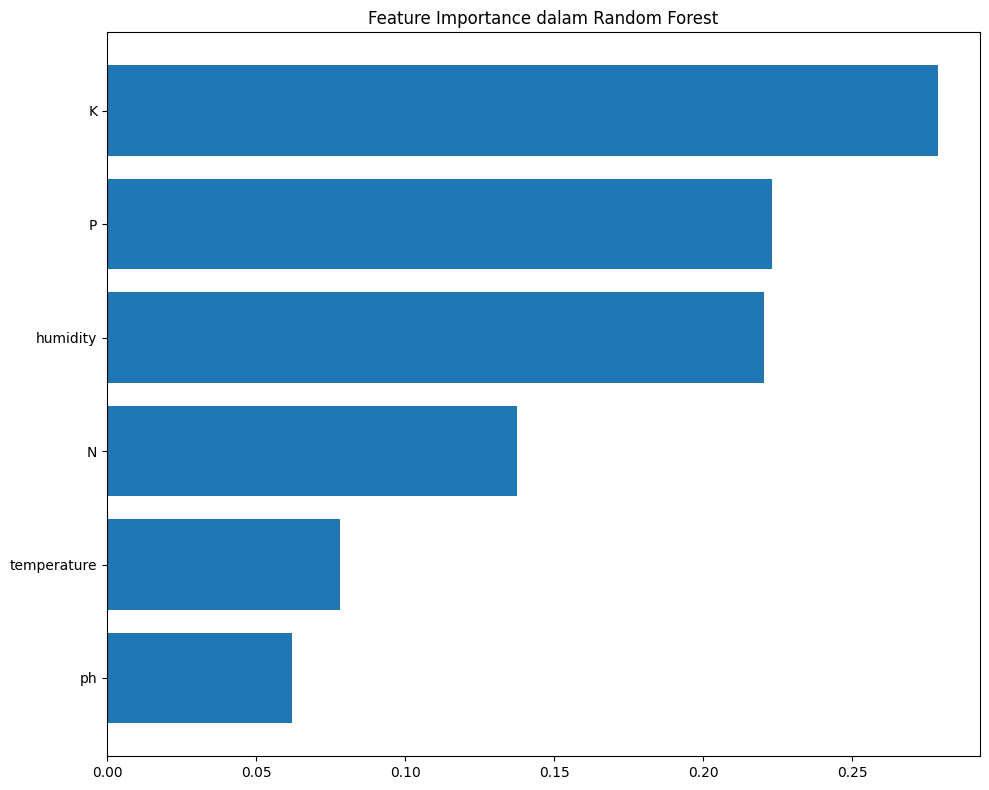

In [27]:
feature_importance = model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importance dalam Random Forest')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

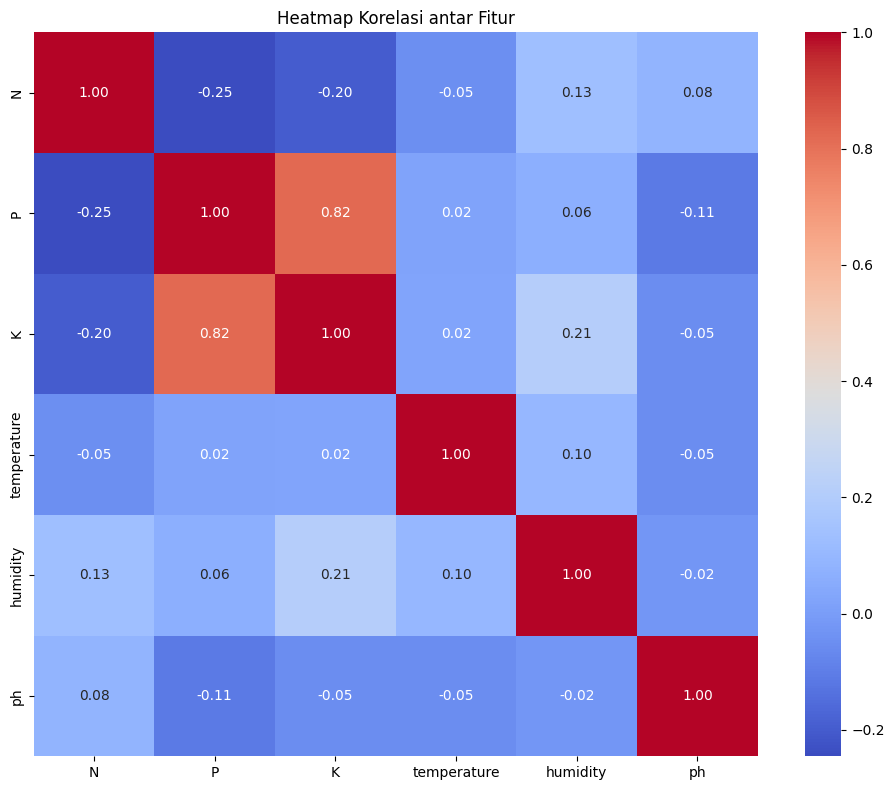

In [28]:
correlation_matrix = df.drop('label', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi antar Fitur')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

In [29]:

data_baru = pd.DataFrame([{
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20.87,
    "humidity": 82.00,
    "ph": 6.50,
}])

if best_model == model_scaled:
    data_baru_transformed = scaler.transform(data_baru)
    hasil_prediksi = best_model.predict(data_baru_transformed)
    prob_prediksi = best_model.predict_proba(data_baru_transformed)
else:
    hasil_prediksi = best_model.predict(data_baru)
    prob_prediksi = best_model.predict_proba(data_baru)

print("\nRekomendasi Tanaman untuk data baru:", hasil_prediksi[0])

classes = best_model.classes_

print("\nProbabilitas prediksi untuk setiap kelas:")
for i, kelas in enumerate(classes):
    print(f"{kelas}: {prob_prediksi[0][i]:.4f}")


Rekomendasi Tanaman untuk data baru: rice

Probabilitas prediksi untuk setiap kelas:
Soyabeans: 0.0000
apple: 0.0000
banana: 0.0300
beans: 0.0000
coffee: 0.0500
cotton: 0.0000
cowpeas: 0.0000
grapes: 0.0000
groundnuts: 0.0000
maize: 0.0700
mango: 0.0100
orange: 0.0000
peas: 0.0000
rice: 0.7500
watermelon: 0.0900
